<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/Dacon_Credit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# 컬럼부터 정리하고 가설을 세우는게 좋다
1. gender 성별
2. car 차량 소유 여부
3. reality 부동산 소유 여부
4. child_num 자녀 수
5. income_total 연간 소득
6. edu_type 교육 수준
7. family_type 결혼 여부
8. house_type 생활방식
9. income_type 소득 분류
10. DAYS_BIRTH 출생일
11. DAYS_EMPLOYED 업무 시작일
12. FLAG_MOBIL 핸드폰 소유 여부
13. work_phone 업무용 전화 소유 여부
14. phone 전화 소유 여부
15. email 이메일 소유 여부
16. occyp_type 직업 유형
17. family_size 가족 규모
18. begin_month 신용카드 발급 월
19. credit 신용도

In [ ]:
# 데이터 수집
df = pd.read_csv('/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/BOAZ 18기/22-1 방학 세션/분석 22-1 base 방학 세션/미니프로젝트/train.csv')
# df_Test = pd.read_csv('/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/BOAZ 18기/22-1 방학 세션/분석 22-1 base 방학 세션/미니프로젝트/test.csv')

In [ ]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


# ① 데이터 분석

In [ ]:
# ①데이터 분석

#데이터 확인
print(df.shape)
print(df.info())

(26457, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

In [ ]:
#결측치 확인
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

일변량 변수 탐색 및 종속변수와의 관계 파악

0. 신용도(종속변수)
```
→ 낮은 값을 가질수록 높은 신용도라고 생각
→ 2로 신용도가 낮은 사람이 거의 절반 넘게 64% 존재
```

In [ ]:
df.credit.value_counts()/(16968+6267+3222)*100

2.0    64.134256
1.0    23.687493
0.0    12.178252
Name: credit, dtype: float64

1. 성별

In [ ]:
df.gender.value_counts()

F    17697
M     8760
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdf3af2d690>,
 [Text(-0.5566605258930385, 0.9487513156314914, 'F'),
  Text(0.5566606147215453, -0.9487512635131673, 'M')],
 [Text(-0.30363301412347554, 0.5175007176171771, '66.9%'),
  Text(0.3036330625753883, -0.5175006891890003, '33.1%')])

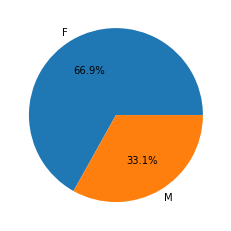

In [ ]:
plt.pie(pd.Series(df.gender.value_counts()/26457*100), labels=['F','M'], autopct='%.1f%%')

count    17697.000000
mean         1.518788
std          0.701732
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    8760.000000
mean        1.521119
std         0.703432
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: credit, dtype: float64


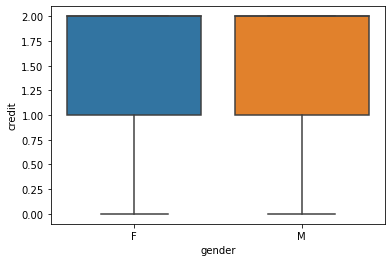

In [ ]:
sns.boxplot(x='gender', y='credit', data=df)
print(df[df.gender=='F'].credit.describe())
print()
print(df[df.gender=='M'].credit.describe())

#유의미한 차이는 없음

In [ ]:
pd.crosstab(df.credit, df.gender)

#성별별로 신용도의 분포는 거의 유사함

gender,F,M
credit,,
0.0,2148,1074
1.0,4220,2047
2.0,11329,5639


2. 차량 소유 여부

In [ ]:
df.car.value_counts()

N    16410
Y    10047
Name: car, dtype: int64

count    10047.000000
mean         1.526525
std          0.704404
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    16410.000000
mean         1.515296
std          0.700968
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64


car,N,Y
credit,,
0.0,1982,1240
1.0,3990,2277
2.0,10438,6530


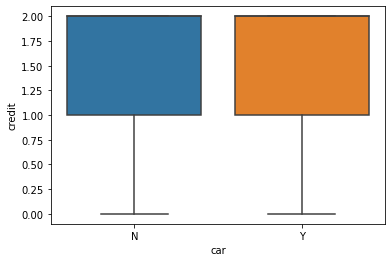

In [ ]:
sns.boxplot(x='car', y='credit', data=df)
print(df[df.car=='Y'].credit.describe())
print()
print(df[df.car=='N'].credit.describe())

pd.crosstab(df.credit, df.car)
#유의미한 차이는 없음

3. 부동산 소유 여부

In [ ]:
df.reality.value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

count    17830.000000
mean         1.514975
std          0.701333
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    8627.000000
mean        1.529037
std         0.704189
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: credit, dtype: float64


reality,N,Y
credit,,
0.0,1064,2158
1.0,1935,4332
2.0,5628,11340


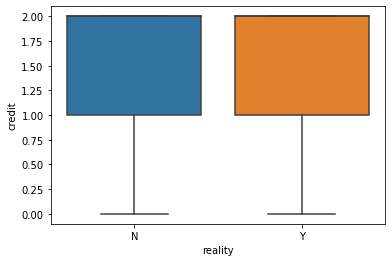

In [ ]:
sns.boxplot(x='reality', y='credit', data=df)
print(df[df.reality=='Y'].credit.describe())
print()
print(df[df.reality=='N'].credit.describe())

pd.crosstab(df.credit, df.reality)
#유의미한 차이는 없음

In [ ]:
#자동차와 부동산 소유 여부에 따른 
df['car_reality'] = df['car']+df['reality']    #임의의 car_reality 컬럼 생성
i=0
for i in range(0,df.shape[0]):
    if (df.car[i]=='N')&(df.reality[i]=='N'):
        df['car_reality']=='NN'
    elif (df.car[i]=='N')&(df.reality[i]=='Y'):
        df['car_reality']=='NY'
    elif (df.car[i]=='Y')&(df.reality[i]=='N'):
        df['car_reality']=='YN'
    else:
        df['car_reality']=='YY'

In [ ]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,NN
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,NY
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,YY
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,NY
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,YY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0,NN
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,...,-2475,1,0,0,0,NaN,2.0,-47.0,2.0,NY
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0,YN
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,-107,1,0,0,0,Laborers,1.0,-59.0,2.0,NY


In [ ]:
grouped = df['credit'].groupby(df['car_reality'])
grouped.describe()

#차는 없고, 집이 있는 사람의 신용도가 다른 경우에 비해 높았음

,count,mean,std,min,25%,50%,75%,max
car_reality,,,,,,,,
NN,5251.0,1.534374,0.694543,0.0,1.0,2.0,2.0,2.0
NY,11159.0,1.506318,0.703823,0.0,1.0,2.0,2.0,2.0
YN,3376.0,1.520735,0.718960,0.0,1.0,2.0,2.0,2.0
YY,6671.0,1.529456,0.696959,0.0,1.0,2.0,2.0,2.0


In [ ]:
grouped = df['income_total'].groupby(df['car_reality'])
grouped.describe()

#그렇다고 car_reality=='NY'인 사람의 연간소득이 다른 범주에 비해 높은 것은 아니었음

,count,mean,std,min,25%,50%,75%,max
car_reality,,,,,,,,
NN,5251.0,164107.806513,79569.893054,27000.0,112500.0,144000.0,202500.0,990000.0
NY,11159.0,173203.390985,91626.086258,27000.0,112500.0,157500.0,202500.0,945000.0
YN,3376.0,210149.268217,111424.076687,31500.0,135000.0,184500.0,261000.0,1350000.0
YY,6671.0,217598.269675,117983.596536,29250.0,135000.0,198000.0,270000.0,1575000.0


In [ ]:
print(df[(df.car_reality=='NY')&(df.income_total<173203.39)].credit.mean(), '연간 소득이 평균보다 낮은 고객 신용도')
print(df[(df.car_reality=='NY')&(df.income_total>173203.39)].credit.mean(), '연간 소득이 평균보다 높은 고객 신용도')

1.5039879608728368 연간 소득이 평균보다 낮은 고객 신용도
1.509747452370403 연간 소득이 평균보다 높은 고객 신용도


4. 자녀 수

In [ ]:
df.child_num.value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

자녀수가 7 이상으로 이상치로 보이는 고객 분석
```
1. 결혼여부
```

In [ ]:
print(df[df.child_num==7].family_type.value_counts())
print(df[df.child_num==14].family_type.value_counts())
print(df[df.child_num==19].family_type.value_counts())

#자녀 수가 19인 사람은 결혼도 안한 사람인데 자녀수가 19명이므로 제거가 필요

Married    2
Name: family_type, dtype: int64
Separated    3
Name: family_type, dtype: int64
Single / not married    1
Name: family_type, dtype: int64


```
2. 가족 규모
```

In [ ]:
print(df[df.child_num==7].family_size.value_counts())
print(df[df.child_num==14].family_size.value_counts())
print(df[df.child_num==19].family_size.value_counts())

#가족 규모에 대해서는 모두 자녀수 value값이 더 작았음

9.0    2
Name: family_size, dtype: int64
15.0    3
Name: family_size, dtype: int64
20.0    1
Name: family_size, dtype: int64


In [ ]:
(df.child_num > df.family_size).sum()
df[(df.child_num > df.family_size)]

#딱 한 경우 존재했는데, 한부모가정일수도 있으니 삭제하지 않음

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0,YN


```
3. 출생일
: 양수로 변환 후, 365로 나누어서 대략적인 나이 추측 가능하도록 변환
: 나이가 어린데 자녀수가 많이 존재하면 이상치라고 판단 > 그런 고객은 존재하지 않았음
```

In [ ]:
df.DAYS_BIRTH = -df.DAYS_BIRTH

In [ ]:
df.DAYS_BIRTH = df.DAYS_BIRTH/365
df.DAYS_BIRTH

0        38.079452
1        31.178082
2        52.293151
3        41.336986
4        41.197260
           ...    
26452    33.093151
26453    41.893151
26454    27.621918
26455    27.794521
26456    53.613699
Name: DAYS_BIRTH, Length: 26457, dtype: float64

In [ ]:
#나이가 21살 아래이면서 자녀수가 존재하거나 많은 고객은 없었음
df[df.DAYS_BIRTH<21].child_num.value_counts()

Series([], Name: child_num, dtype: int64)

5. 연간 소득

In [ ]:
np.set_printoptions(precision=10)

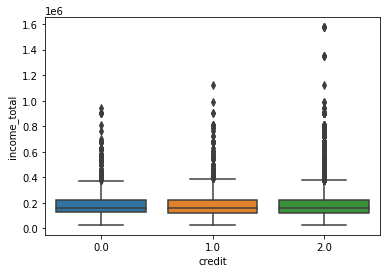

In [ ]:
sns.boxplot(x='credit', y='income_total', data=df)

#일단 보기에, 신용도가 낮은 고객일수록 연간소득이 큰 사람이 많았음
#그러나 신용도가 2인 고객이 애초에 많았고, 이상치의 영향 제거 > 중앙값으로 판단

In [ ]:
df['income_total'].groupby(df['credit']).describe()

#실제로 신용도가 높은 사람들의 연간 소득이 높은 것을 확인할 수 있었음

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,190807.582402,102139.548208,29250.0,126000.0,162000.0,225000.0,945000.0
1.0,6267.0,181122.701532,92548.262258,27000.0,117000.0,157500.0,225000.0,1125000.0
2.0,16968.0,188925.666991,104981.727565,27000.0,121500.0,157500.0,225000.0,1575000.0


6. 소득 분류

In [ ]:
df.income_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

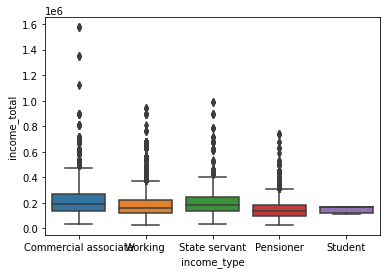

In [ ]:
sns.boxplot(x='income_type', y='income_total', data=df)

In [ ]:
#학생인 사람의 결혼여부와 출생일 확인

print(df[(df.income_type=='Student')].family_type.value_counts())
print()
print(df[df.income_type=='Student'].DAYS_BIRTH)

# 2990/3602/8936/21681 와 11646/23119 중복데이터??

Married                 4
Civil marriage          2
Single / not married    1
Name: family_type, dtype: int64

2990     0.0
3602     0.0
6223     0.0
8936     0.0
11646    0.0
21681    0.0
23119    0.0
Name: DAYS_BIRTH, dtype: float64


7. 교육 수준

In [ ]:
df.edu_type.value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
pd.crosstab(df.credit, df.edu_type)

#교육수준에 따라서 신용도의 분포가 유사하고, Academic degree에서는 샘플수가 작아서 조금의 오차를 보이는 것 같음

edu_type,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
credit,,,,,
0.0,2,909,114,28,2169
1.0,7,1751,246,59,4204
2.0,14,4502,660,170,11622


8. 결혼 여부

In [ ]:
df.family_type.value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
pd.crosstab(df.credit, df.family_type)

family_type,Civil marriage,Married,Separated,Single / not married,Widow
credit,,,,,
0.0,288,2213,193,402,126
1.0,539,4140,349,940,299
2.0,1296,11843,997,2154,678


9. 출생일

In [ ]:
df.DAYS_BIRTH = df.DAYS_BIRTH*365

In [ ]:
df.DAYS_BIRTH.describe()

count    26457.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: DAYS_BIRTH, dtype: float64

10. 업무 시작일

In [ ]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED']>0, 0, -df['DAYS_EMPLOYED'])
df.DAYS_EMPLOYED.describe()

count    26457.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
df['DAYS_BIRTH'] = np.where(df['DAYS_BIRTH']>0, 0, -df['DAYS_BIRTH'])

In [ ]:
print(sum((df.DAYS_BIRTH)<(df.DAYS_EMPLOYED)), '으로 근무일수가 태어난 날보다 많은 이상치는 없었음')

0 으로 근무일수가 태어난 날보다 많은 이상치는 없었음


In [ ]:
boolean = [True, True]
print(sum(boolean))

2


11. 핸드폰 소유 여부
```
: 모두 1의 value를 가지므로 컬럼 삭제
```

12. 업무용 전화 소유 여부

13. 전화 소유 여부

14. 이메일 소유 여부

15. 직업 유형

In [ ]:
#너무 많은 수준이 존재하므로, 상위 클래스로 묶어주는 작업 필요
#직업 자체가 없어서 결측치인 사람, 입력 오류로 결측치인 사람의 구분 필요
#근무일수가 없는 직업유형은 어떤 범주로 전처리 할지 고민이 필요
df.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
df.occyp_type.isnull().sum()

8171

In [ ]:
df[(df.occyp_type.isnull())&(df.DAYS_EMPLOYED==0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,1,0,0,0,NaN,2.0,-6.0,1.0,NN
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,0,0,1,NaN,3.0,-38.0,2.0,YY
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,1,0,NaN,1.0,-41.0,2.0,NY
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-37.0,2.0,NY
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-7.0,2.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-57.0,2.0,NY
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-43.0,2.0,NY
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-21.0,1.0,NY
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,1,1,0,NaN,2.0,-2.0,1.0,NN


# ② 데이터 시각화로 분석

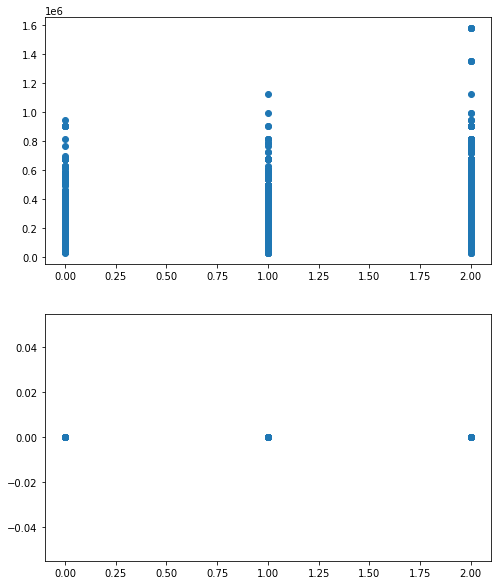

In [ ]:
# ②데이터 시각화로 분석

# 연속형 데이터

# 분석 내용 1. 신용등급이 가장 낮은 그룹이 총 수입이 높게 분포 
# -> 샘플의 갯수를 세어보니 약 13000개 정도 많음 
# -> 가장 적은 등급의 샘플 갯수를 기준으로 랜덤 샘플링 
# -> 이상하다고 생각할 정도는 아닌 결과 

plt.figure(figsize = (8, 10))
plt.subplot(211)
plt.scatter(df['credit'], df['income_total'])

plt.subplot(212)
plt.scatter(df['credit'], df['DAYS_BIRTH'])
plt.show()

In [ ]:
# 14000명의 차이
df.groupby('credit').count()[['car']]

,car
credit,
0.0,3222
1.0,6267
2.0,16968


```
불편향 데이터 일반화 작업
```

In [ ]:
# 신용등급 0, 1, 2별 3000명씩만 뽑기
df_0 = df[ df['credit'] == 0 ]
df_1 = df[ df['credit'] == 1 ]
df_2 = df[ df['credit'] == 2 ]

df_0 = df_0.reset_index()
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()

rand0 = np.random.choice(df_0.shape[0], 3000)
rand1 = np.random.choice(df_1.shape[0], 3000)
rand2 = np.random.choice(df_2.shape[0], 3000)


# Exp 데이터 프레임 = credit 별로 3000명 맞춘 데이터
df_Train_Exp = pd.concat([df_0.loc[rand0], df_1.loc[rand1], df_2.loc[rand2]], ignore_index = True)

In [ ]:
df_Train_Exp

,level_0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,1079,1079,M,Y,Y,0,238500.0,Working,Higher education,Married,...,0,1,0,0,0,Laborers,2.0,-55.0,0.0,YY
1,16056,16056,M,N,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,...,0,1,0,0,0,Laborers,3.0,-6.0,0.0,NY
2,5451,5451,F,Y,Y,1,157500.0,State servant,Secondary / secondary special,Married,...,0,1,0,0,0,Laborers,3.0,-23.0,0.0,YY
3,16417,16417,F,N,Y,0,121500.0,Pensioner,Secondary / secondary special,Married,...,0,1,0,0,0,NaN,2.0,-41.0,0.0,NY
4,10647,10647,F,N,Y,1,90000.0,Working,Secondary / secondary special,Civil marriage,...,0,1,0,1,0,Laborers,3.0,-1.0,0.0,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,477,477,F,Y,Y,0,126000.0,Pensioner,Secondary / secondary special,Married,...,0,1,0,0,0,NaN,2.0,-43.0,2.0,YY
8996,18687,18687,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,...,0,1,0,0,0,Security staff,2.0,-25.0,2.0,YN
8997,15712,15712,F,N,Y,2,202500.0,Working,Secondary / secondary special,Civil marriage,...,0,1,0,0,0,Cleaning staff,4.0,-36.0,2.0,NY
8998,14014,14014,F,N,Y,0,202500.0,Commercial associate,Higher education,Married,...,0,1,0,0,0,NaN,2.0,-12.0,2.0,NY


```
3000명으로 기준을 잡으니 신용도가 제일 낮은 그룹에서 수입이 제일 높은 상황 사라짐
```

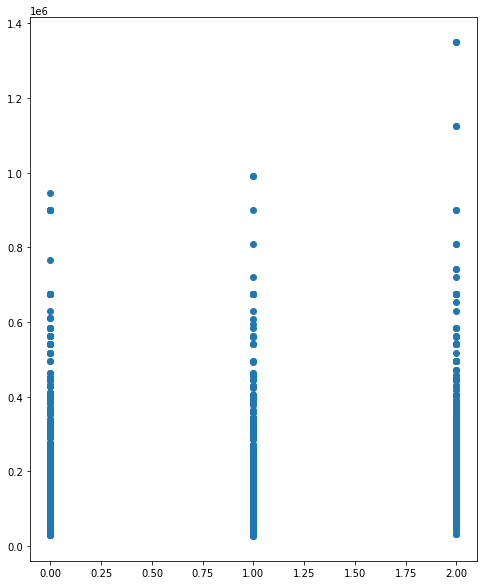

In [ ]:
plt.figure(figsize = (8, 10))
plt.scatter(df_Train_Exp['credit'], df_Train_Exp['income_total'])
plt.show()

In [ ]:
df.groupby('credit').count()[['DAYS_BIRTH']]

,DAYS_BIRTH
credit,
0.0,3222
1.0,6267
2.0,16968


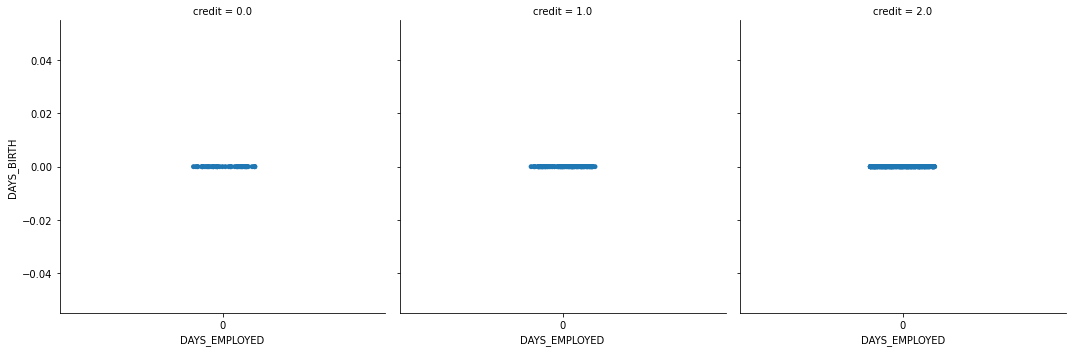

In [ ]:
# 데이터가 너무커서 catplot이 되지않아 스플릿 데이터 500개 추출
rand = np.random.choice(df.shape[0], 500)

# 1. 전반적으로 나이가 어림
# 2. 나이가 많을수록 업무일 수도 많음
sns.catplot(x = 'DAYS_EMPLOYED', y = 'DAYS_BIRTH', data = df.loc[rand], col = 'credit', col_wrap=3)
plt.show()

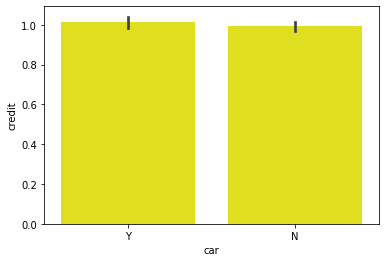

,credit
car,
N,0.992023
Y,1.013397


In [ ]:
# 범주형 데이터 

#barplot : 평균 그래프
sns.barplot(x = 'car', y = 'credit', data=df_Train_Exp, color = "yellow")
plt.show()

# 수량을 맞추니 1.0가 나오는 모습 -> 수량을 맞추지 않으면 2등급이 너무 많아서 1.5가 평균으로 나옵니다.
df_Train_Exp.groupby('car').mean()[['credit']]

```
막대그래프와 히스토그램은 평균을 보여줌
따라서 신용도 2가 가장 많은 데이터에서 1이 아닌 1.5의 편향성을 보였음
```

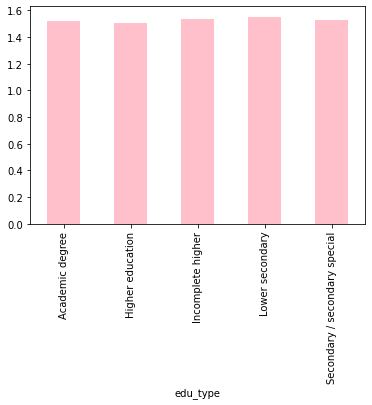

In [ ]:
# kt식 pivot으로 그래프 그리는 방식

# Exp2 = edu_type을 인덱스로 한 데이터 프레임
df_Train_Exp2 = df.pivot_table(index = ['edu_type'])
df_Train_Exp2['credit'].plot(kind = "bar", color = "pink")
plt.show()

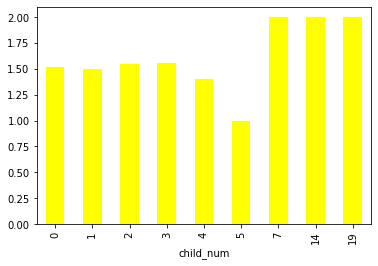

In [ ]:
# 3 = child_num을 인덱스로한 데이터 프레임
df_Train_Exp3 = df.pivot_table(index = ['child_num'])
df_Train_Exp3['credit'].plot(kind = "bar", color = "yellow")
plt.show()

[Text(0, 0, 'Accountants'),
 Text(0, 0, 'Cleaning staff'),
 Text(0, 0, 'Cooking staff'),
 Text(0, 0, 'Core staff'),
 Text(0, 0, 'Drivers'),
 Text(0, 0, 'HR staff'),
 Text(0, 0, 'High skill tech staff'),
 Text(0, 0, 'IT staff'),
 Text(0, 0, 'Laborers'),
 Text(0, 0, 'Low-skill Laborers'),
 Text(0, 0, 'Managers'),
 Text(0, 0, 'Medicine staff'),
 Text(0, 0, 'Private service staff'),
 Text(0, 0, 'Realty agents'),
 Text(0, 0, 'Sales staff'),
 Text(0, 0, 'Secretaries'),
 Text(0, 0, 'Security staff'),
 Text(0, 0, 'Waiters/barmen staff')]

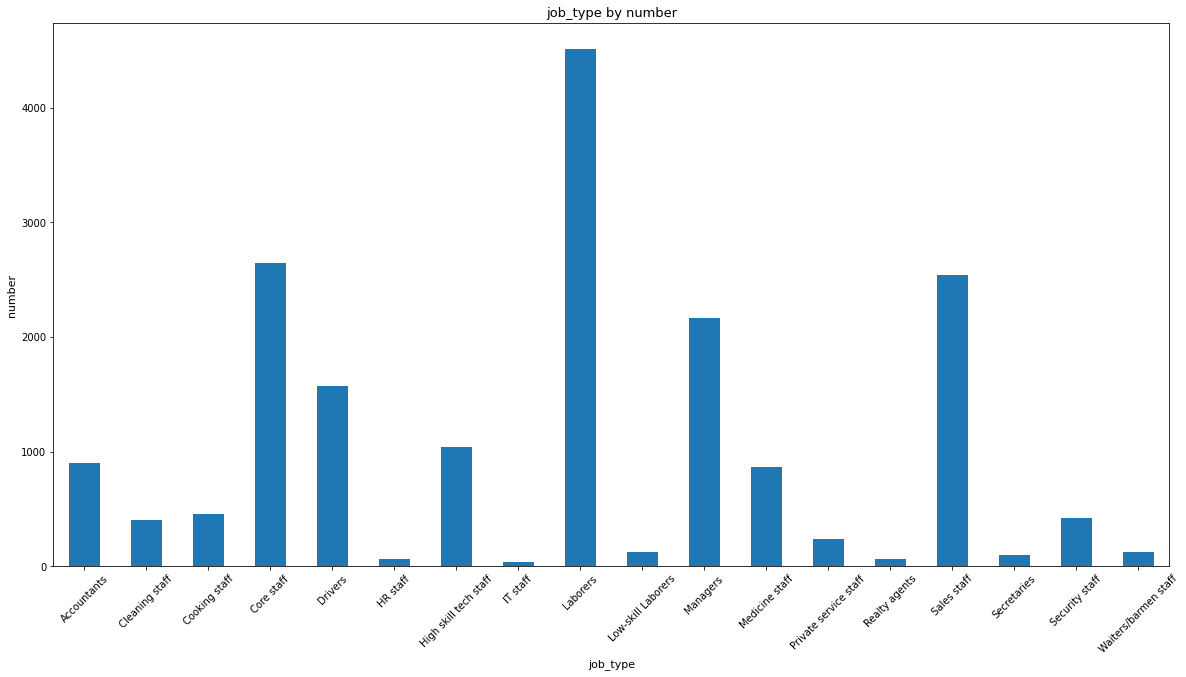

In [ ]:
#하나의 특성에 대한 범주 값들의 분포를 그래프로 출력

ot = df.groupby('occyp_type').count()['index']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

```
여기서부터 목적을 정하기 위한 가설 시작
```

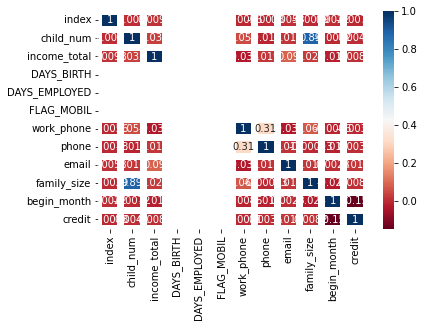

In [ ]:
sns.heatmap(df.corr(), linewidths = 6, cmap="RdBu", annot = True) 
plt.show()

In [ ]:
# 가설 1 -> 부동산 소유시 신용도가 낮은 비욜이 증가하나? 
df['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [ ]:
df_Reality_Y = df[df['reality'] == 'Y']
df_Reality_N = df[df['reality'] == 'N']

```
항상 (편향데이터 외에도) 여러가지 조건으로 시각화를 해봐야한다.
```

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


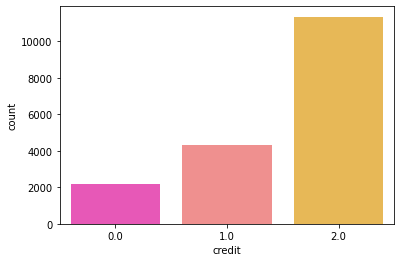

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


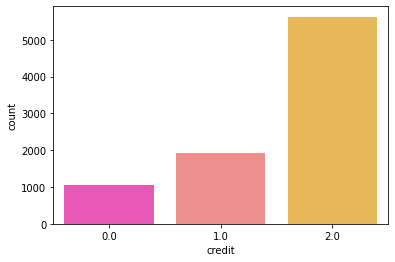

In [ ]:
sns.countplot('credit', palette = 'spring', data = df_Reality_Y)
plt.show()

sns.countplot('credit', palette = 'spring', data = df_Reality_N)
plt.show()

In [ ]:
# 가설 2 -> 자녀 수, 결혼 여부에 따른 신용도
df['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
# 내 로컬 코드 참조
'''
print(df_Train['credit'].value_counts(),'\n\n\n\n',df_Child0_M['credit'].value_counts(),\
      '\n\n\n\n',df_Child1_M['credit'].value_counts(),'\n\n\n\n', df_Child2_M['credit'].value_counts())
      # '\n\n\n\n',df_Child3_M['credit'].value_counts(),'\n\n\n\n', df_Child4_M['credit'].value_counts(),\
      # '\n\n\n\n',df_Child5_M['credit'].value_counts())

print('\n\n\n\n',df_Child0_S['credit'].value_counts(),\
      '\n\n\n\n',df_Child1_S['credit'].value_counts(),'\n\n\n\n', df_Child2_S['credit'].value_counts())
      # '\n\n\n\n',df_Child3_S['credit'].value_counts(),'\n\n\n\n', df_Child4_S['credit'].value_counts(),\
      # '\n\n\n\n',df_Child5_S['credit'].value_counts())
      '''

```
2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64 



 2.0    1230
1.0     450
0.0     236
Name: credit, dtype: int64 



 2.0    1418
1.0     477
0.0     295
Name: credit, dtype: int64 



 2.0    1780
1.0     588
0.0     291
Name: credit, dtype: int64




 2.0    322
1.0    144
0.0     50
Name: credit, dtype: int64 



 2.0    144
1.0     83
0.0     22
Name: credit, dtype: int64 



 2.0    62
1.0    11
0.0     7
Name: credit, dtype: int64
```

In [ ]:
# ③데이터 전처리

# 의미없는 값 제거
df['FLAG_MOBIL'].value_counts() 

In [ ]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
car_reality         0
dtype: int64

In [ ]:
df = df.fillna(method = "bfill")

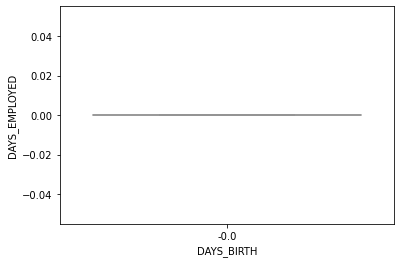

In [ ]:
# 상관관계가 높은 특성의 이상치 탐지
sns.boxplot(x = df['DAYS_BIRTH'], y = df['DAYS_EMPLOYED'], data = df, palette = "RdBu")
plt.show()

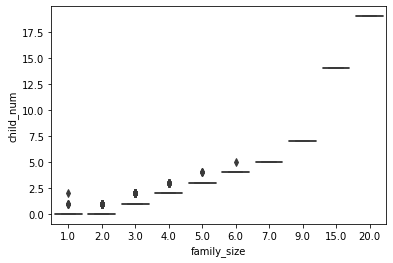

In [ ]:
sns.boxplot(x = df['family_size'], y = df['child_num'], data = df, palette = "RdBu")
plt.show()

In [ ]:
# 자식수 10명 이상 제거
df[ df['child_num'] > 10 ]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,Drivers,15.0,-7.0,2.0,YY
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,Drivers,15.0,-58.0,2.0,YY
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0,NY
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,Drivers,15.0,-43.0,2.0,YY


In [ ]:
df_Total = df[ df['child_num'] <= 10 ]

→ 추가적인 이상치 분석에 대한 Question
```
1) 자녀수가 가족수보다 많거나 같은 경우인 6개의 샘플 → 삭제?
2) 결혼여부가 싱글/미혼인데 자녀가 존재하는 509개의 샘플 → 삭제?
```

In [ ]:
df[(df.family_type=='Single / not married')&(df.child_num>0)].child_num.value_counts()

#싱글/미혼인데 자녀수가 6인 고객도 존재함

1     440
2      56
3      12
19      1
Name: child_num, dtype: int64

(1)  income_total(연간소득)
```
: 박스플롯을 살펴보면 이상치가 많이 존재하는 것을 확인했고, 극단적 이상치로 보이는 1,200,000 이상의 값을 1,200,000으로 변환
```

{'boxes': [<matplotlib.lines.Line2D at 0x7fdf359d2150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdf359eb290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf359df290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf359ebd50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdf359d26d0>,
  <matplotlib.lines.Line2D at 0x7fdf359d2450>]}

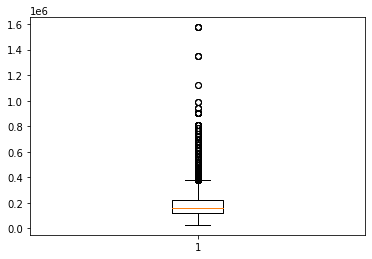

In [ ]:
plt.boxplot(df.income_total)

In [ ]:
df.at[df.income_total>1200000,'income_total'] = 1200000

(2) family_size(가족 규모) ★★★ 매우 좋은 분석
법
```
: 전체 관측치 중에서 8 이상의 값을 가지는 샘플은 0.06%의 이상치라고 판단, 모두 8로 치환
: 이때 싱글/미혼인데 자녀가 존재하는 샘플 → 이상치로 생각됨 !
```

In [ ]:
print(df.family_size.value_counts())

(9+3+2+1)/26457*100

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


0.056695770495521026

{'boxes': [<matplotlib.lines.Line2D at 0x7fdf3848c150>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdf3847d150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf35a5f710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf3847d910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdf3848c6d0>,
  <matplotlib.lines.Line2D at 0x7fdf3848cc10>]}

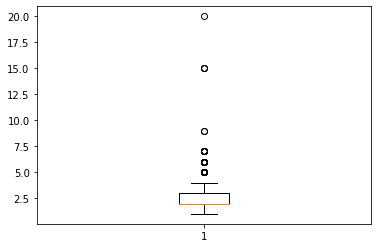

In [ ]:
plt.boxplot(df.family_size)

In [ ]:
df[df.family_size>8][['family_size','child_num','family_type','DAYS_BIRTH']]

#실제로 가족규모가 8 초과인 샘플들의 가족규모, 자녀수, 결혼여부, 나이 등에서 모순점은 찾을 수 없었지만
#너무 특이한 값을 가지므로, 이상치로 판단하여 최대의 가족수를 모두 8로 치환해준다.

,family_size,child_num,family_type,DAYS_BIRTH
8462,15.0,14,Separated,-0.0
9021,15.0,14,Separated,-0.0
10731,20.0,19,Single / not married,-0.0
25313,9.0,7,Married,-0.0
25390,15.0,14,Separated,-0.0
25638,9.0,7,Married,-0.0


In [ ]:
df[df.family_type=='Single / not married'].child_num.value_counts()

#싱글/미혼인데 자녀가 존재한다? → 이상치로 생각됨

df[df.index==10731][['family_size','child_num','family_type']]

,family_size,child_num,family_type
10731,20.0,19,Single / not married


In [ ]:
df.at[df.family_size>8, 'family_size'] = 8

(3) begin month(신용카드 발급 월)
```
: 이상치는 따로 없었고, 식별하기 쉽도록 부호만 변경해주었음
: 이후 태어난 월 수보다 신용카드 발급 월 수가 많으면 이상치인 점을 탐색해보기
```

In [ ]:
df.begin_month = (-1)*df.begin_month

{'boxes': [<matplotlib.lines.Line2D at 0x7fdf383e4c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdf383d0c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf383e2c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf383e2790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdf383d0210>,
  <matplotlib.lines.Line2D at 0x7fdf383d0750>]}

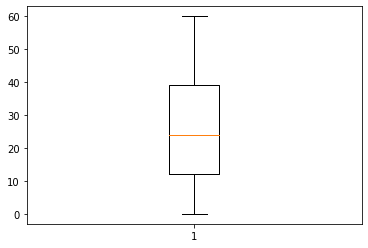

In [ ]:
plt.boxplot(df.begin_month)

#이상치는 따로 없어보이고, 식별하기 쉽도록 부호만 변경해주었음

(4) DAYS_BIRTH(출생일)
```
: 부호 변경과 함께, 나이로 직관적인 판단을 위해서 년 단위로 치환
```

In [ ]:
df.DAYS_BIRTH = (-1)*df.DAYS_BIRTH /365   

In [ ]:
#신용카드 발급 월 수와 태어난 월 수 
df[(df.DAYS_BIRTH*30 < df.begin_month)].shape

#예상했던 모순적인 샘플은 존재하지 않았음

(26226, 21)

In [ ]:
#출생일과 업무 시작일
df[(df.DAYS_BIRTH*365<=((-1)*df.DAYS_EMPLOYED))].shape

#예상했던 모순적인 샘플은 존재하지 않았음

(26457, 21)

(5) DAYS_EMPLOYED(업무 시작일)
```
: 기존 value값에서는 0이 최대여야하지만 양수가 존재, 양수를 0으로 치환
: 부호값을 변경하고, 직관적인 비교를 위해 월 단위로 치환
```

In [ ]:
df.DAYS_EMPLOYED.value_counts()

0    26457
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
df.at[df.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = 0
df.DAYS_EMPLOYED = (-1)*df.DAYS_EMPLOYED/30

In [ ]:
df.DAYS_EMPLOYED.value_counts()

0.0    26457
Name: DAYS_EMPLOYED, dtype: int64

(6) child_num(자녀수)

In [ ]:
df.child_num.value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7fdf35708650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdf3570c690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf357156d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf35715190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdf35708bd0>,
  <matplotlib.lines.Line2D at 0x7fdf3570c150>]}

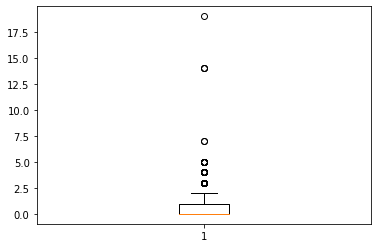

In [ ]:
plt.boxplot(df.child_num)

#결국 자녀수가 7 이상인 샘플은 이상치로 판단되고, 6으로 치환해준다. 

In [ ]:
df.at[df.child_num>=6, 'child_num'] = 6

(+) 추가적인 이상치 분석
```
: 자녀수가 가족수보다 많거나 같은 경우인 6개의 샘플 → 삭제?
```

In [ ]:
df[(df.child_num>=df.family_size)][['child_num','family_size','family_type']]

,child_num,family_size,family_type
5825,1,1.0,Single / not married
14900,2,1.0,Married
16110,1,1.0,Single / not married
16791,1,1.0,Married
18879,1,1.0,Civil marriage
21096,1,1.0,Married
